In [1]:
id = {'KLONGTEI': 'cluster_1892287670_272491964_272492178',
      'RAMA4': 'cluster_272488163_282390730_66263210_66263222',
      'NARANONG': 'cluster_272488164_272492179_3457051443_61907354',
      'SUNLAKAKHON': 'gneJ83',
      'KASEMRAT': 'cluster_272448137_272555800_272555808_7660045934_7710268409',
      'ATTHAKAWI_RAMA4' : '270329335'}
number_phase = [3,7,6,4,3,3]

In [2]:
# import gym
# from gym import error, spaces
import csv
import os, sys
sys.path.append(os.path.join('/home/ring/sumo-svn/', 'tools'))
import traci
import traci.constants as tc
import numpy as np
from sumolib import checkBinary
import datetime
import matplotlib
import matplotlib.pyplot as plt
import torch
import copy
import random
import pandas as pd
from multiprocessing.pool import ThreadPool
from itertools import zip_longest

In [3]:
namelane_csv = pd.read_csv('namelane_KASEMRAT.csv')
namelane_df = pd.DataFrame(namelane_csv, columns = ['name' , 'id'])
NAME = namelane_df.set_index('name')
ID = namelane_df.set_index('id')
if NAME.loc['KASEMRAT_EB_0_0_XSXX','id'] == '459551209#3_0':
    print('ok')

ok


In [4]:
# list(NAME['id'])

In [5]:
ID.loc['824116550#0_0']#, '820373198#0', '820373196#0', '482209831#0']

name    NARANONG_SW_0_0_LSXX
Name: 824116550#0_0, dtype: object

In [6]:
# RAMA4
RAMA4_EB_R = [NAME.loc['RAMA4_EB_1_4_XSXX','id'], NAME.loc['RAMA4_EB_0_3_XSRT','id']]
RAMA4_EB = [NAME.loc['KLONGTEI_EB_0_0_XSXX','id'],NAME.loc['KLONGTEI_EB_0_1_XSXX','id'],NAME.loc['KLONGTEI_EB_0_2_XSXX','id'],NAME.loc['KLONGTEI_EB_0_3_XSXX','id'],NAME.loc['KLONGTEI_EB_0_4_XSRT','id'],NAME.loc['KLONGTEI_EB_1_0_XSXX','id'],NAME.loc['KLONGTEI_EB_1_1_XSXX','id'],NAME.loc['KLONGTEI_EB_1_2_XSXX','id'],NAME.loc['KLONGTEI_EB_1_3_XSXX','id'],NAME.loc['KLONGTEI_EB_2_0_LSXX','id'],NAME.loc['KLONGTEI_EB_2_1_XSXX','id'],NAME.loc['KLONGTEI_EB_2_2_XSXX','id'],NAME.loc['KLONGTEI_EB_2_3_XSXX','id'],NAME.loc['KLONGTEI_EB_3_0_LSXX','id'],NAME.loc['KLONGTEI_EB_3_1_XSXX','id'],NAME.loc['KLONGTEI_EB_4_0_XSXX','id'],NAME.loc['KLONGTEI_EB_4_1_XSXX','id'],NAME.loc['KLONGTEI_EB_4_2_XSXX','id'],NAME.loc['KLONGTEI_EB_4_3_XSXX','id'],NAME.loc['KLONGTEI_EB_4_4_XSXX','id'],NAME.loc['KLONGTEI_EB_5_0_XSXX','id'],NAME.loc['KLONGTEI_EB_5_1_XSXX','id'],NAME.loc['KLONGTEI_EB_5_2_XSXX','id'],NAME.loc['KLONGTEI_EB_5_3_XSXX','id'],NAME.loc['RAMA4_EB_0_0_XSXX','id'],NAME.loc['RAMA4_EB_0_1_XSXX','id'],NAME.loc['RAMA4_EB_0_2_XSXX','id'],NAME.loc['RAMA4_EB_0_3_XSRT','id'],NAME.loc['RAMA4_EB_1_0_LSXX','id'],NAME.loc['RAMA4_EB_1_1_XSXX','id'],NAME.loc['RAMA4_EB_1_2_XSXX','id'],NAME.loc['RAMA4_EB_1_3_XSXX','id'],NAME.loc['RAMA4_EB_1_4_XSXX','id']]
RAMA4_SB = [NAME.loc['RAMA4_SB_0_0_XSXX','id'],NAME.loc['RAMA4_SB_0_1_XSXX','id'],NAME.loc['RAMA4_SB_0_2_XSRT','id'],NAME.loc['RAMA4_SB_1_0_LSXX','id'],NAME.loc['RAMA4_SB_1_1_XSXX','id'],NAME.loc['RAMA4_SB_1_2_XSXX','id'],NAME.loc['RAMA4_SB_1_3_XSXX','id'],NAME.loc['RAMA4_SB_2_0_XSXX','id'],NAME.loc['RAMA4_SB_2_1_XSXX','id'],NAME.loc['RAMA4_SB_2_2_XSXX','id'],NAME.loc['RAMA4_SB_3_0_XSXX','id'],NAME.loc['RAMA4_SB_3_1_XSXX','id'],NAME.loc['RAMA4_SB_3_2_XSXX','id'],NAME.loc['RAMA4_SB_3_3_XSRX','id'],NAME.loc['RAMA4_SB_4_0_XSXX','id'],NAME.loc['RAMA4_SB_4_1_XSXX','id'],NAME.loc['RAMA4_SB_4_2_XSXX','id'],NAME.loc['RAMA4_SB_5_0_XSXX','id'],NAME.loc['RAMA4_SB_5_1_XSXX','id'],NAME.loc['RAMA4_SB_5_2_XSXX','id'],NAME.loc['RAMA4_SB_5_3_XSXX','id'],NAME.loc['RAMA4_SB_5_4_XSXX','id']]
RAMA4_NB = [NAME.loc['RAMA4_NB_0_0_XSXX','id'],NAME.loc['RAMA4_NB_0_1_XSXX','id'],NAME.loc['RAMA4_NB_0_2_XSRT','id'],NAME.loc['RAMA4_NB_1_0_LSXX','id'],NAME.loc['RAMA4_NB_1_1_XSXX','id'],NAME.loc['RAMA4_NB_1_2_XSXX','id'],NAME.loc['RAMA4_NB_1_3_XSXX','id'],NAME.loc['RAMA4_NB_2_0_XSXX','id'],NAME.loc['RAMA4_NB_2_1_XSXX','id'],NAME.loc['RAMA4_NB_2_2_XSXX','id'],NAME.loc['RAMA4_NB_3_0_XSXX','id'],NAME.loc['RAMA4_NB_3_1_XSXX','id']]
RAMA4_WB = [NAME.loc['RAMA4_WB_0_0_XSXX','id'],NAME.loc['RAMA4_WB_0_1_XSXX','id'],NAME.loc['RAMA4_WB_0_2_XSXX','id'],NAME.loc['RAMA4_WB_0_3_XSXX','id'],NAME.loc['RAMA4_WB_0_4_XSRT','id'],NAME.loc['RAMA4_WB_1_0_LSXX','id'],NAME.loc['RAMA4_WB_1_1_XSXX','id'],NAME.loc['RAMA4_WB_1_2_XSXX','id'],NAME.loc['RAMA4_WB_1_3_XSXX','id'],NAME.loc['RAMA4_WB_1_4_XSXX','id'],NAME.loc['RAMA4_WB_1_5_XSXX','id'],NAME.loc['RAMA4_WB_2_0_XSXX','id'],NAME.loc['RAMA4_WB_2_1_XSXX','id'],NAME.loc['RAMA4_WB_2_2_XSXX','id'],NAME.loc['RAMA4_WB_2_3_XSXX','id'],NAME.loc['RAMA4_WB_3_0_XSXX','id'],NAME.loc['RAMA4_WB_3_1_XSXX','id'],NAME.loc['RAMA4_WB_3_2_XSXX','id'],NAME.loc['RAMA4_WB_4_0_XSXX','id'],NAME.loc['RAMA4_WB_4_1_XSXX','id'],NAME.loc['RAMA4_WB_5_0_LSXX','id'],NAME.loc['RAMA4_WB_5_1_XSXX','id'],NAME.loc['RAMA4_WB_5_2_XSXX','id'],NAME.loc['RAMA4_WB_6_0_LSXX','id'],NAME.loc['RAMA4_WB_6_1_XSXX','id'],NAME.loc['RAMA4_WB_6_2_XSXX','id']]
RAMA4_WB_R = [NAME.loc['RAMA4_WB_0_4_XSRT','id'], NAME.loc['RAMA4_WB_1_5_XSXX','id'],NAME.loc['RAMA4_WB_2_3_XSXX','id']]

In [7]:
KLONGTEI_NB = [NAME.loc['KLONGTEI_NB_0_0_LSXX','id'],NAME.loc['KLONGTEI_NB_0_1_XSXX','id'],NAME.loc['KLONGTEI_NB_0_2_XSXX','id'],NAME.loc['KLONGTEI_NB_0_3_XSRT','id'],NAME.loc['KLONGTEI_NB_1_0_LSXX','id'],NAME.loc['KLONGTEI_NB_1_1_XSXX','id'],NAME.loc['KLONGTEI_NB_1_2_XSXX','id'],NAME.loc['KLONGTEI_NB_1_3_XSXX','id'],NAME.loc['KLONGTEI_NB_2_0_LSXX','id'],NAME.loc['KLONGTEI_NB_2_1_XSXX','id'],NAME.loc['KLONGTEI_NB_2_2_XSXX','id'],NAME.loc['KLONGTEI_NB_2_3_XSXX','id']]

In [8]:
# NARANONG
NARANONG_EB = [NAME.loc['NARANONG_EB_0_0_LSXX','id'],NAME.loc['NARANONG_EB_0_1_XSRT','id'],NAME.loc['NARANONG_EB_1_0_XSXX','id'],NAME.loc['NARANONG_EB_1_1_XSXX','id'],NAME.loc['NARANONG_EB_2_0_XSXX','id'],NAME.loc['NARANONG_EB_2_1_XSXX','id'],NAME.loc['NARANONG_EB_2_2_XSXX','id'],NAME.loc['NARANONG_EB_3_0_XSXX','id'],NAME.loc['NARANONG_EB_3_1_XSRX','id'],NAME.loc['NARANONG_EB_4_0_LSXX','id'],NAME.loc['NARANONG_EB_4_1_XSXX','id'],NAME.loc['NARANONG_EB_5_0_LSXX','id'],NAME.loc['NARANONG_EB_5_1_XSRX','id']]
NARANONG_WB = [NAME.loc['NARANONG_WB_0_0_LSXX','id'],NAME.loc['NARANONG_WB_0_1_XSXX','id'],NAME.loc['NARANONG_WB_0_2_XSXX','id'],NAME.loc['NARANONG_WB_0_3_XSRT','id'],NAME.loc['NARANONG_WB_1_0_XSXX','id'],NAME.loc['NARANONG_WB_1_1_XSXX','id'],NAME.loc['NARANONG_WB_1_2_XSXX','id'],NAME.loc['NARANONG_WB_2_0_LSXX','id'],NAME.loc['NARANONG_WB_2_1_XSXX','id'],NAME.loc['NARANONG_WB_2_2_XSXX','id'],NAME.loc['NARANONG_WB_3_0_XSXX','id'],NAME.loc['NARANONG_WB_3_1_XSXX','id'],NAME.loc['NARANONG_WB_3_2_XSXX','id'],NAME.loc['NARANONG_WB_3_3_XSXX','id'],NAME.loc['NARANONG_WB_4_0_XSXX','id'],NAME.loc['NARANONG_WB_4_1_XSXX','id'],NAME.loc['NARANONG_WB_4_2_XSXX','id']]
NARANONG_SB = [NAME.loc['NARANONG_SB_0_0_LSXX','id'],NAME.loc['NARANONG_SB_0_1_XSXX','id'],NAME.loc['NARANONG_SB_0_2_XSRX','id'],NAME.loc['NARANONG_SB_1_0_LSXX','id'],NAME.loc['NARANONG_SB_1_1_XSXX','id'],NAME.loc['NARANONG_SB_1_2_XSXX','id'],NAME.loc['NARANONG_SB_1_3_XSXX','id'],NAME.loc['NARANONG_SB_2_0_XSXX','id'],NAME.loc['NARANONG_SB_2_1_XSXX','id'],NAME.loc['NARANONG_SB_2_2_XSXX','id'],NAME.loc['NARANONG_SB_2_3_XSXX','id']]
NARANONG_SW = [NAME.loc['NARANONG_SW_0_1_XSRX','id'],NAME.loc['NARANONG_SW_1_0_XSXX','id'],NAME.loc['NARANONG_SW_1_1_XSXX','id'],NAME.loc['NARANONG_SW_1_2_XSXX','id'],NAME.loc['NARANONG_SW_1_3_XSXX','id'],NAME.loc['NARANONG_SW_2_0_XSXX','id'],NAME.loc['NARANONG_SW_2_1_XSXX','id'],NAME.loc['NARANONG_SW_2_2_XSXX','id']]
NARANONG_NB = [NAME.loc['NARANONG_NB_0_0_XSXX','id'],NAME.loc['NARANONG_NB_0_1_XSRX','id'],NAME.loc['NARANONG_NB_1_0_LSXX','id'],NAME.loc['NARANONG_NB_1_1_XSXX','id'],NAME.loc['NARANONG_NB_1_2_XSXX','id'],NAME.loc['NARANONG_NB_2_0_XSXX','id'],NAME.loc['NARANONG_NB_2_1_XSXX','id']]
NARANONG_EB_R = [NAME.loc['NARANONG_EB_0_1_XSRT','id']]

In [9]:
# SUNLAKAKHON
SUNLAKAKHON_EB = [NAME.loc['SUNLAKAKHON_EB_0_0_LSXX','id'],NAME.loc['SUNLAKAKHON_EB_0_1_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_0_2_XSRT','id'],NAME.loc['SUNLAKAKHON_EB_1_0_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_1_1_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_1_2_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_1_3_XSRX','id'],NAME.loc['SUNLAKAKHON_EB_2_0_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_2_1_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_2_2_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_3_0_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_3_1_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_4_0_XSXX','id']]
SUNLAKAKHON_WB = [NAME.loc['SUNLAKAKHON_WB_0_0_LSXX','id'],NAME.loc['SUNLAKAKHON_WB_0_1_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_0_2_XSRX','id'],NAME.loc['SUNLAKAKHON_WB_1_0_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_1_1_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_1_2_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_2_0_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_2_1_XSXX','id']]
SUNLAKAKHON_SB = [NAME.loc['SUNLAKAKHON_SB_0_0_LSXX','id'],NAME.loc['SUNLAKAKHON_SB_0_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_0_2_XSRT','id'],NAME.loc['SUNLAKAKHON_SB_1_0_LSXX','id'],NAME.loc['SUNLAKAKHON_SB_1_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_1_2_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_1_3_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_2_0_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_2_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_2_2_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_3_0_LSXX','id'],NAME.loc['SUNLAKAKHON_SB_3_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_3_2_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_3_3_XSRX','id'],NAME.loc['SUNLAKAKHON_SB_4_0_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_4_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_4_2_XSXX','id']]
SUNLAKAKHON_NB = [NAME.loc['SUNLAKAKHON_NB_0_0_LSXX','id'],NAME.loc['SUNLAKAKHON_NB_0_1_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_0_2_XSRX','id'],NAME.loc['SUNLAKAKHON_NB_1_0_LSXX','id'],NAME.loc['SUNLAKAKHON_NB_1_1_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_1_2_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_2_0_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_2_1_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_2_2_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_3_0_LSXX','id'],NAME.loc['SUNLAKAKHON_NB_3_1_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_3_2_XSXX','id']]

In [10]:
# KASEMRAT
KASEMRAT_EB = [NAME.loc['KASEMRAT_EB_0_0_XSXX','id'],NAME.loc['KASEMRAT_EB_0_1_XSXX','id'],NAME.loc['KASEMRAT_EB_0_2_XSXX','id'],NAME.loc['KASEMRAT_EB_0_3_XSRT','id'],NAME.loc['KASEMRAT_EB_1_0_LSXX','id'],NAME.loc['KASEMRAT_EB_1_1_XSXX','id'],NAME.loc['KASEMRAT_EB_1_2_XSXX','id'],NAME.loc['KASEMRAT_EB_1_3_XSXX','id'],NAME.loc['KASEMRAT_EB_2_0_LSXX','id'],NAME.loc['KASEMRAT_EB_2_1_XSXX','id'],NAME.loc['KASEMRAT_EB_2_2_XSXX','id'],NAME.loc['KASEMRAT_EB_3_0_LSXX','id'],NAME.loc['KASEMRAT_EB_3_1_XSXX','id'],NAME.loc['KASEMRAT_EB_3_2_XSXX','id'],NAME.loc['KASEMRAT_EB_4_0_LSXX','id'],NAME.loc['KASEMRAT_EB_4_1_XSXX','id'],NAME.loc['KASEMRAT_EB_4_2_XSXX','id'],NAME.loc['KASEMRAT_EB_5_0_LSXX','id'],NAME.loc['KASEMRAT_EB_5_1_XSXX','id'],NAME.loc['KASEMRAT_EB_5_2_XSXX','id'],NAME.loc['KASEMRAT_EB_5_3_XSXX','id'],NAME.loc['KASEMRAT_EB_6_0_LSXX','id'],NAME.loc['KASEMRAT_EB_6_1_XSXX','id'],NAME.loc['KASEMRAT_EB_6_2_XSXX','id'],NAME.loc['KASEMRAT_EB_6_3_XSXX','id'],NAME.loc['KASEMRAT_EB_7_0_LSXX','id'],NAME.loc['KASEMRAT_EB_7_1_XSXX','id'],NAME.loc['KASEMRAT_EB_7_2_XSXX','id'],NAME.loc['KASEMRAT_EB_7_3_XSXX','id'],NAME.loc['KASEMRAT_EB_8_0_XSXX','id'],NAME.loc['KASEMRAT_EB_8_1_XSXX','id'],NAME.loc['KASEMRAT_EB_8_2_XSXX','id'],NAME.loc['KASEMRAT_EB_8_3_XSXX','id'],NAME.loc['KASEMRAT_EB_8_4_XSXX','id'],NAME.loc['KASEMRAT_EB_9_0_XSXX','id'],NAME.loc['KASEMRAT_EB_9_1_XSXX','id'],NAME.loc['KASEMRAT_EB_9_2_XSXX','id'],NAME.loc['KASEMRAT_EB_9_3_XSXX','id']]
KASEMRAT_WB = [NAME.loc['KASEMRAT_WB_0_0_LSXX','id'],NAME.loc['KASEMRAT_WB_0_1_XSXX','id'],NAME.loc['KASEMRAT_WB_0_2_XSXX','id'],NAME.loc['KASEMRAT_WB_1_0_XSXX','id'],NAME.loc['KASEMRAT_WB_1_1_XSXX','id'],NAME.loc['KASEMRAT_WB_1_2_XSXX','id'],NAME.loc['KASEMRAT_WB_1_3_XSRX','id'],NAME.loc['KASEMRAT_WB_2_0_XSXX','id'],NAME.loc['KASEMRAT_WB_2_1_XSXX','id'],NAME.loc['KASEMRAT_WB_2_2_XSXX','id'],NAME.loc['KASEMRAT_WB_3_0_LSXX','id'],NAME.loc['KASEMRAT_WB_3_1_XSXX','id'],NAME.loc['KASEMRAT_WB_3_2_XSXX','id']]
KASEMRAT_NB = [NAME.loc['KASEMRAT_NB_0_0_LSXX','id'],NAME.loc['KASEMRAT_NB_0_1_XSXX','id'],NAME.loc['KASEMRAT_NB_0_2_XSRX','id'],NAME.loc['KASEMRAT_NB_1_0_LSXX','id'],NAME.loc['KASEMRAT_NB_1_1_XSXX','id'],NAME.loc['KASEMRAT_NB_1_2_XSXX','id'],NAME.loc['KASEMRAT_NB_2_0_XSXX','id'],NAME.loc['KASEMRAT_NB_2_1_XSXX','id'],NAME.loc['KASEMRAT_NB_3_0_LSXX','id'],NAME.loc['KASEMRAT_NB_3_1_XSXX','id'],NAME.loc['KASEMRAT_NB_3_2_XSXX','id'],NAME.loc['KASEMRAT_NB_3_3_XSRT','id'],NAME.loc['KASEMRAT_NB_4_0_XSXX','id'],NAME.loc['KASEMRAT_NB_4_1_XSXX','id'],NAME.loc['KASEMRAT_NB_4_2_XSXX','id'],NAME.loc['KASEMRAT_NB_5_0_XSXX','id'],NAME.loc['KASEMRAT_NB_5_1_XSXX','id'],NAME.loc['KASEMRAT_NB_5_2_XSXX','id'],NAME.loc['KASEMRAT_NB_5_3_XSXX','id'],NAME.loc['KASEMRAT_NB_6_0_XSXX','id'],NAME.loc['KASEMRAT_NB_6_1_XSXX','id'],NAME.loc['KASEMRAT_NB_6_2_XSXX','id']]
KASEMRAT_EB_R = [NAME.loc['KASEMRAT_EB_0_3_XSRT','id'],NAME.loc['KASEMRAT_EB_1_3_XSXX','id']]

In [11]:
MASUKGRIDLOCK = [NAME.loc['MASUKGRIDLOCK_ARI_NB_0_0_LSXX','id'],NAME.loc['MASUKGRIDLOCK_MASUK_WB_0_0_LSRX','id'],NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_0_0_XSRT','id'],NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'],NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id']]
SUKHUMVIT = [NAME.loc['MASUKGRIDLOCK_SUKHUMVUT22_SB_0_0_XSXX','id'],NAME.loc['MASUKGRIDLOCK_SUKHUMVUT24_SB_0_0_XSXX','id']]

In [12]:
#decision threshold

In [13]:
#MAX GREEN TIME

In [14]:
#reset the environment
def start():
    sumoBinary = checkBinary('sumo-gui')
    traci.start([sumoBinary, "-c", "KASEMRAT-SUMO-UsingBookNetFile/osm.sumocfg",
                             "--tripinfo-output", "tripinfo.xml", '--start','true','--quit-on-end','true','--time-to-teleport','-1',
                '--lanechange.duration', '0.1'])

In [15]:
def get_occupancy_average_percent(detector_id): #get_occupancy_average
    occupancy = sum([traci.lanearea.getLastStepOccupancy(e) for e in detector_id])/len(detector_id)
    return occupancy

In [16]:
def get_flow_sum(detector_id):
    # return number of vehicles on detector_id during last time step
    #https://sumo.dlr.de/docs/TraCI/Lane_Area_Detector_Value_Retrieval.html
    flow = sum([traci.lanearea.getLastStepVehicleNumber(e) for e in detector_id])#-sum([traci.lanearea.getJamLengthVehicle(e) for e in detector_id])
    return flow

In [17]:
def get_mean_speed(detector_id):
    mean_speed = sum([traci.lanearea.getLastStepMeanSpeed(e) for e in detector_id])/len(detector_id)
    return meanspeed

In [18]:
def get_numberoflane(e,detector_id):
    numberoflane = 0
    for d in detector_id:
        if e[:-2] == d[:-2]:
            numberoflane += 1
    return numberoflane 

In [19]:
def get_unjamlength_meters(detector_id): 
    detector_length = sum(traci.lanearea.getLength(e) for e in detector_id)
    unjamlength = detector_length - (sum([traci.lanearea.getJamLengthMeters(e) for e in detector_id])) #/detector_length
    return unjamlength

In [20]:
def RAMA4_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[2]
    next_phase_ifno_interupt = selected_traffic_signal_phases[3]
    greentime_duration = list_greentime_duration[1]
#     print('get_flow_sum(get_detector_id(Onnut_edge[WB]))', get_flow_sum(get_detector_id(Onnut_edge['WB'])))
#     print('get_flow_sum(get_detector_id(Onnut_edge[SB]))', get_flow_sum(get_detector_id(Onnut_edge['SB'])))
#     print('unjamlength_meters Onnut_edge WB', get_unjamlength_meters(get_detector_id(Onnut_edge['WB'])))
#     print('occupancy Onnut_edge SB', get_occupancy_average_percent(get_detector_id(Onnut_edge['SB'])))

    if current_phase == 1: #*** --->1
#         print('occupancy',get_occupancy_average_percent(RAMA4_EB))
#         print('flow',get_flow_sum(RAMA4_EB_R))
        if threshold['RAMA4_FP1_TP3_OCC'] >= get_occupancy_average_percent(RAMA4_EB) : 
            current_phase = 3
        elif duration['RAMA4_FP1_END_MAXGREEN'] <= greentime_duration or threshold['RAMA4_FP1_END_FLOW'] >= get_flow_sum(RAMA4_EB_R):
            if  next_phase_ifno_interupt == None:
                current_phase = 3
            else:
                current_phase = next_phase_ifno_interupt 
                next_phase_ifno_interupt = None
        elif threshold['RAMA4_FPX_TP5_UNJAM'] >= get_unjamlength_meters(RAMA4_NB):
            next_phase_ifno_interupt = 3
            current_phase = 5
    elif current_phase == 3: #---><---3
        if threshold['RAMA4_FP3_END_FLOW'] >= get_flow_sum(RAMA4_WB_R) and \
         threshold['RAMA4_FP3_END_OCC'] >= get_occupancy_average_percent(RAMA4_EB):
            current_phase = 2
        elif duration['RAMA4_FP3_END_MAXGREEN']<= greentime_duration: #Pupe
            current_phase = 2
        elif threshold['RAMA4_FPX_TP1_UNJAM'] >= get_unjamlength_meters(RAMA4_EB):
            next_phase_ifno_interupt = 2
            current_phase = 1
        elif threshold['RAMA4_FPX_TP5_UNJAM'] >= get_unjamlength_meters(RAMA4_NB):
            next_phase_ifno_interupt = 2
            current_phase = 5
    elif current_phase == 2: #<---2
        if duration['RAMA4_FP2_END_MAXGREEN'] <= greentime_duration or threshold['RAMA4_FP2_END_FLOW'] >= get_flow_sum(RAMA4_WB_R):
            current_phase = 4
        elif threshold['RAMA4_FPX_TP1_UNJAM'] >= get_unjamlength_meters(RAMA4_EB):
            next_phase_ifno_interupt = 4
            current_phase = 1
        elif threshold['RAMA4_FPX_TP5_UNJAM'] >= get_unjamlength_meters(RAMA4_NB):
            next_phase_ifno_interupt = 4
            current_phase = 5
    elif current_phase == 4: #v4
        if duration['RAMA4_FP4_END_MAXGREEN'] <= greentime_duration or threshold['RAMA4_FP4_END_UNJAM'] >= get_unjamlength_meters(RAMA4_SB):
            current_phase += 1
        elif threshold['RAMA4_FPX_TP1_UNJAM'] >= get_unjamlength_meters(RAMA4_EB):
            next_phase_ifno_interupt = 5
            current_phase = 1
        elif threshold['RAMA4_FPX_TP5_UNJAM'] >= get_unjamlength_meters(RAMA4_NB):
            next_phase_ifno_interupt = None
            current_phase = 5
    elif current_phase == 5: #***** ^5
        if threshold['RAMA4_FPX_TP1_UNJAM'] >= get_unjamlength_meters(RAMA4_EB):
            current_phase = 1
        elif duration['RAMA4_FP5_END_MAXGREEN'] <= greentime_duration or threshold['RAMA4_FP5_END_OCC'] >= get_occupancy_average_percent(RAMA4_NB):
            if next_phase_ifno_interupt == None:
                current_phase = 1
            else:
                current_phase = next_phase_ifno_interupt
                next_phase_ifno_interupt = None
        
#         elif get_remain_length(get_detector_id(['825786383#0'])) <= 20:
#             next_phase_ifno_interupt = 2
#             current_phase = 2
    if selected_traffic_signal_phases[2] == current_phase:
        greentime_duration += 5
    else: greentime_duration = 0
    RAMA4_greentime_duration = greentime_duration
    RAMA4_phase = current_phase
    next_RAMA4_phase_ifno_interupt = next_phase_ifno_interupt
    return RAMA4_greentime_duration , RAMA4_phase, next_RAMA4_phase_ifno_interupt

In [21]:
def KLONGTEI_find_action(RAMA4_phase, selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[0]
    KLONGTEI_NO_P2_greentime_duration = list_greentime_duration[0]
    if current_phase == 2:
        if threshold['KLONGTEI_FP2_END_FLOW'] >= get_flow_sum(KLONGTEI_NB) :
            current_phase = 1
    elif RAMA4_phase == 1 or RAMA4_phase == 3:
        current_phase = 3
    elif RAMA4_phase == 2:
        current_phase = 1
    if duration['KLONGTEI_NO_P2_MAXGREEN'] <= KLONGTEI_NO_P2_greentime_duration :
        current_phase = 2
    if current_phase == 1 or current_phase == 3:
        KLONGTEI_NO_P2_greentime_duration += 5
    else: 
        KLONGTEI_NO_P2_greentime_duration = 0
    KLONGTEI_NO_P2_greentime_duration = KLONGTEI_NO_P2_greentime_duration
    KLONGTEI_phase = current_phase
    next_KLONGTEI_phase_ifno_interupt = None
    return KLONGTEI_NO_P2_greentime_duration , KLONGTEI_phase, next_KLONGTEI_phase_ifno_interupt

In [22]:
def NARANONG_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[4]
    next_phase_ifno_interupt = selected_traffic_signal_phases[5]
    greentime_duration = list_greentime_duration[2]
#     print('get_unjamlength_meters(NARANONG_SW)',get_unjamlength_meters(NARANONG_SW))
    if current_phase == 1:
        if duration['NARANONG_FP1_END_MINGREEN'] >= greentime_duration:
            current_phase = 1
        elif threshold['NARANONG_FPX_TP2_UNJAM'] >= get_unjamlength_meters(NARANONG_EB):
            if next_phase_ifno_interupt == None:
                current_phase = 4
            else:
                current_phase = 4 
                next_phase_ifno_interupt = next_phase_ifno_interupt
        elif duration['NARANONG_FP1_END_MAXGREEN'] <= greentime_duration or \
        threshold['NARANONG_FP1_END_UNJAM'] >= get_unjamlength_meters(NARANONG_SW): 
            if next_phase_ifno_interupt == None:
                current_phase = 2
            else:
                current_phase = next_phase_ifno_interupt 
                next_phase_ifno_interupt = None
    elif current_phase == 4:
        if duration['NARANONG_FP2_END_MINGREEN'] >= greentime_duration:
            current_phase == 4
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(NARANONG_SW):
            if next_phase_ifno_interupt == None:
                current_phase = 1
            else:
                current_phase =  0
                next_phase_ifno_interupt = next_phase_ifno_interupt
        elif threshold['NARANONG_FP2_END_UNJAM'] >= get_unjamlength_meters(NARANONG_WB) or duration['NARANONG_FP2_END_MAXGREEN'] <= greentime_duration:
            if next_phase_ifno_interupt == None:
                current_phase = 3
            else:
                current_phase =  next_phase_ifno_interupt
                next_phase_ifno_interupt = None
    elif current_phase == 3:
        if duration['NARANONG_FP3_END_MINGREEN'] >= greentime_duration:
            current_phase == 3
        elif threshold['NARANONG_FPX_TP2_UNJAM'] >= get_unjamlength_meters(NARANONG_WB):
            next_phase_ifno_interupt = current_phase+1
            current_phase = 4
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(NARANONG_SW):
            next_phase_ifno_interupt = current_phase+1
            current_phase = 1
        elif threshold['NARANONG_FP3_END_FLOW'] >= get_flow_sum(NARANONG_EB_R) or duration['NARANONG_FP3_END_MAXGREEN'] <= greentime_duration:
            current_phase = 4
    elif current_phase == 2:
        if duration['NARANONG_FP3_END_MINGREEN'] >= greentime_duration:
            current_phase = 2
        elif threshold['NARANONG_FPX_TP2_UNJAM'] >= get_unjamlength_meters(NARANONG_WB):
            next_phase_ifno_interupt = current_phase+1
            current_phase = 4
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(NARANONG_SW):
            next_phase_ifno_interupt = current_phase+1
            current_phase = 1
        elif threshold['NARANONG_FP4_END_UNJAM'] >= get_unjamlength_meters(NARANONG_WB) or duration['NARANONG_FP4_END_MAXGREEN'] <= greentime_duration:
            current_phase = 5
    elif current_phase == 5:
        if threshold['NARANONG_FPX_TP2_UNJAM'] >= get_unjamlength_meters(NARANONG_WB):
            next_phase_ifno_interupt = current_phase+1
            current_phase = 4
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(NARANONG_SW):
            next_phase_ifno_interupt = current_phase+1
            current_phase = 1
        elif threshold['NARANONG_FP5_END_OCC'] >= get_occupancy_average_percent(NARANONG_SB) or duration['NARANONG_FP5_END_MAXGREEN'] <= greentime_duration:
            current_phase = 6
    elif current_phase == 6:
        if threshold['NARANONG_FPX_TP2_UNJAM'] >= get_unjamlength_meters(NARANONG_WB):
            next_phase_ifno_interupt = 1
            current_phase = 4
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(NARANONG_SW):
            next_phase_ifno_interupt = None
            current_phase = 1
        elif threshold['NARANONG_FP6_END_OCC'] >= get_occupancy_average_percent(NARANONG_NB) or duration['NARANONG_FP6_END_MAXGREEN'] <= greentime_duration:
            current_phase = 1
    if selected_traffic_signal_phases[4] == current_phase:
        greentime_duration += 5
    else: greentime_duration = 0
    NARANONG_greentime_duration = greentime_duration
    NARANONG_phase = current_phase
    next_NARANONG_phase_ifno_interupt = next_phase_ifno_interupt
    return NARANONG_greentime_duration,NARANONG_phase, next_NARANONG_phase_ifno_interupt

In [23]:
def SUNLAKAKHON_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[6]
    next_phase_ifno_interupt = selected_traffic_signal_phases[7]
    greentime_duration = list_greentime_duration[3]
    if current_phase == 1:
        if duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration or threshold['SUNLAKAKHON_FP1_END_FLOW'] >= get_flow_sum(SUNLAKAKHON_SB): 
            if next_phase_ifno_interupt == None:
                current_phase = 2
            else:
                current_phase = next_phase_ifno_interupt 
                next_phase_ifno_interupt = None
    elif current_phase == 2:
        if threshold['SUNLAKAKHON_FPX_TP1_UNJAM'] >= get_unjamlength_meters(SUNLAKAKHON_SB):
            next_phase_ifno_interupt = current_phase+1
            current_phase = 1
        elif duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration or threshold['SUNLAKAKHON_FP2_END_FLOW'] >= get_flow_sum(SUNLAKAKHON_NB): 
            current_phase+=2
    elif current_phase == 3:
        if threshold['SUNLAKAKHON_FPX_TP1_UNJAM'] >= get_unjamlength_meters(SUNLAKAKHON_SB):
            next_phase_ifno_interupt = current_phase+1
            current_phase = 1
        elif threshold['SUNLAKAKHON_FP3_TP4_UNJAM'] >= get_unjamlength_meters(SUNLAKAKHON_EB):
            current_phase = 4
        elif duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration or threshold['SUNLAKAKHON_FP3_END_FLOW'] >= get_flow_sum(SUNLAKAKHON_WB): 
            current_phase += 1
    elif current_phase == 4:
        if threshold['SUNLAKAKHON_FPX_TP1_UNJAM'] >= get_unjamlength_meters(SUNLAKAKHON_SB):
            next_phase_ifno_interupt = None
            current_phase = 1
        elif duration['SUNLAKAKHON_FP4_END_MAXGREEN'] <= greentime_duration or threshold['SUNLAKAKHON_FP4_END_FLOW'] >= get_flow_sum(SUNLAKAKHON_WB): 
            current_phase = 1
    if selected_traffic_signal_phases[6] == current_phase:
        greentime_duration += 5
    else: greentime_duration = 0
    SUNLAKAKHON_greentime_duration = greentime_duration
    SUNLAKAKHON_phase = current_phase
    next_SUNLAKAKHON_phase_ifno_interupt = next_phase_ifno_interupt
    return SUNLAKAKHON_greentime_duration, SUNLAKAKHON_phase, next_SUNLAKAKHON_phase_ifno_interupt

In [24]:
def KASEMRAT_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    greentime_duration = list_greentime_duration[4]
    current_phase = selected_traffic_signal_phases[8]
    next_phase_ifno_interupt = selected_traffic_signal_phases[9]
#     print('get_unjamlength_meters(KASEMRAT_NB)',get_unjamlength_meters(KASEMRAT_NB))
    if current_phase == 1:
        if threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(SUKHUMVIT) or\
        threshold['KASEMRAT_FPX_TP2_UNJAM_EB'] >= get_unjamlength_meters(KASEMRAT_EB) or\
        threshold['KASEMRAT_FPX_TP2_UNJAM_ARI'] >= get_unjamlength_meters([NAME.loc['MASUKGRIDLOCK_ARI_NB_0_0_LSXX','id']]) or\
        duration['KASEMRAT_FP1_END_MAXGREEN'] <= greentime_duration:
            current_phase = 2
        elif threshold['KASEMRAT_FPX_TP3_UNJAM'] >= get_unjamlength_meters(KASEMRAT_NB):
            current_phase = 3
    elif current_phase == 2:
        if threshold['KASEMRAT_FPX_TP3_UNJAM'] >= get_unjamlength_meters(KASEMRAT_NB):
            current_phase = 3
        elif threshold['KASEMRAT_FP2_TP1_FLOW'] >= get_flow_sum(KASEMRAT_EB_R) or duration['KASEMRAT_FP2_END_MAXGREEN'] <= greentime_duration:
            current_phase = 1
    elif current_phase == 3:
        if threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(SUKHUMVIT) or\
        threshold['KASEMRAT_FPX_TP2_UNJAM_EB'] >= get_unjamlength_meters(KASEMRAT_EB) or\
        threshold['KASEMRAT_FPX_TP2_UNJAM_ARI'] >= get_unjamlength_meters([NAME.loc['MASUKGRIDLOCK_ARI_NB_0_0_LSXX','id']]):
            current_phase = 2
        if duration['KASEMRAT_FP3_END_MAXGREEN'] <= greentime_duration:
            current_phase = 2
    if selected_traffic_signal_phases[8] == current_phase:
        greentime_duration += 5
    else: greentime_duration = 0
    KASEMRAT_greentime_duration = greentime_duration
    KASEMRAT_phase = current_phase
    next_KASEMRAT_phase_ifno_interupt = None
    return KASEMRAT_greentime_duration, KASEMRAT_phase, next_KASEMRAT_phase_ifno_interupt

In [25]:
def ATTHAKAWI_RAMA4_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[10]
    if current_phase == 1:  
        traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'], ['passenger'])
        traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id'], ['passenger'])
        if threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(SUKHUMVIT):
            current_phase == 2
            traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'], ['passenger'])
            traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id'], ['passenger'])
    elif current_phase == 2:
        traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'], ['passenger'])
        traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id'], ['passenger'])
        if threshold['KASEMRAT_FPX_TP2_UNJAM_EB'] >= get_unjamlength_meters(KASEMRAT_EB):
            current_phase == 1
            traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'], ['passenger'])
            traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id'], ['passenger'])
    ATTHAKAWI_RAMA4_phase = current_phase
    return ATTHAKAWI_RAMA4_phase

In [26]:
def find_action(selected_traffic_signal_phases,list_greentime_duration, decision_threshold, max_greentime_duration):
    pool = ThreadPool(processes=6)
#     ==
# Function traffic_police_action takes inputs, namely, 

# selected_traffic_signal_phases[even index] = current phase of traffic light signal from previous decision time step
# selected_traffic_signal_phases[odd index] = next phase of traffic light signal from previous decision time step if no signal interrttion would occur
# greentime_duration = number of seconds that current phase of traffic light signal has been used
# max_greentime_duration = maximum allowable number of seconds for current phase of traffic light signal

# and returns outputs, namely,

# new_selected_traffic_signal_phases = new value of selected_traffic_signal_phases[0] and selected_traffic_signal_phases[1] (defined above) to be deployed till next decision time step
# new_greentime_duration = new value of greentime_duration to be deployed till next decision time step
#     ==

    #RAMA4
    RAMA4_greentime_duration,RAMA4_phase, next_RAMA4_phase_ifno_interupt = pool.apply_async(RAMA4_find_action, \
                                                                                            (selected_traffic_signal_phases,list_greentime_duration,\
                                                                                             decision_threshold, max_greentime_duration)).get()
    #KLONGTEI
    KLONGTEI_NO_P2_greentime_duration,KLONGTEI_phase, next_KLONGTEI_phase_ifno_interupt = pool.apply_async(KLONGTEI_find_action, (RAMA4_phase\
                                                                                                               , selected_traffic_signal_phases,list_greentime_duration, \
                                                                                                               decision_threshold, max_greentime_duration)).get()
    #NARANONG
    NARANONG_greentime_duration,NARANONG_phase, next_NARANONG_phase_ifno_interupt = pool.apply_async(NARANONG_find_action, (\
                                                                                                                                 selected_traffic_signal_phases,list_greentime_duration, \
                                                                                                                                 decision_threshold, max_greentime_duration)).get()
    #SUNLAKAKHON
    SUNLAKAKHON_greentime_duration, SUNLAKAKHON_phase, next_SUNLAKAKHON_phase_ifno_interupt = pool.apply_async(\
                                                                                                               SUNLAKAKHON_find_action, (selected_traffic_signal_phases,\
                                                                                                                                       list_greentime_duration, decision_threshold,\
                                                                                                                                       max_greentime_duration)).get()
    #KASEMRAT
    KASEMRAT_greentime_duration, KASEMRAT_phase, next_KASEMRAT_phase_ifno_interupt = pool.apply_async(KASEMRAT_find_action, (\
                                                                                                                                  selected_traffic_signal_phases,list_greentime_duration,\
                                                                                                                                  decision_threshold, max_greentime_duration)).get()
    #ATTHAKAWI_RAMA4
    ATTHAKAWI_RAMA4_phase = pool.apply_async(ATTHAKAWI_RAMA4_find_action, (selected_traffic_signal_phases,list_greentime_duration,\
                                                                                decision_threshold, max_greentime_duration)).get()
    new_selected_traffic_signal_phases = [KLONGTEI_phase, next_KLONGTEI_phase_ifno_interupt, \
                                          RAMA4_phase, next_RAMA4_phase_ifno_interupt, NARANONG_phase \
                                          , next_NARANONG_phase_ifno_interupt, SUNLAKAKHON_phase, \
                                          next_SUNLAKAKHON_phase_ifno_interupt, KASEMRAT_phase , \
                                          next_KASEMRAT_phase_ifno_interupt, ATTHAKAWI_RAMA4_phase, None]
    new_greentime_duration = [KLONGTEI_NO_P2_greentime_duration, RAMA4_greentime_duration,NARANONG_greentime_duration,SUNLAKAKHON_greentime_duration,KASEMRAT_greentime_duration,0]
 
    return new_selected_traffic_signal_phases, new_greentime_duration

In [27]:
junction_name = list(id.keys()) 
def take_action(new_selected_traffic_signal_phases):
#     ==
# Function take_action takes inputs, namely, 

# new_selected_traffic_signal_phases[even indec] = current phase of traffic light signal from previous decision time step
# new_selected_traffic_signal_phases[odd index] = next phase of traffic light signal from previous decision time step if no signal interrttion would occur

# and returns outputs, namely,

# JamLengthMeter = sum of jam length in detectors area
# Speed = sum of speed of all vehicles in detectors area
#     ==
    change_to_phase_police = new_selected_traffic_signal_phases[0::2]
#     print(change_to_phase_police)
    change_to_phase_sumo = [e*2-2 for e in change_to_phase_police]
#     print(change_to_phase_sumo)
    current_phase = [traci.trafficlight.getPhase(id[key]) for key in id.keys()]
    for i in range(len(current_phase)):
        if change_to_phase_sumo[i] != current_phase[i]:
            yellow = (change_to_phase_sumo[i]-1)%(2*number_phase[i])
#             print(yellow)
#             print(junction_name[i])
            traci.trafficlight.setPhase(id[junction_name[i]], yellow) #  YELLOW PHASE 
        else:
            traci.trafficlight.setPhase(id[junction_name[i]], change_to_phase_sumo[i]) # No YELLOW PHASE 
    for i in range(5):
        traci.simulationStep()
#     w1 = sum([traci.lanearea.getLastStepOccupancy(e) for e in get_edge_id(reward_w1)])
#     w2 = sum([traci.lanearea.getLastStepOccupancy(e) for e in get_edge_id(reward_w1)])
    lane = traci.lane.getIDList()
    
    JamLengthMeter = sum([traci.lanearea.getJamLengthMeters(i) for i in list(NAME['id'])])
    Speed = sum([traci.lanearea.getLastStepMeanSpeed(i) for i in list(NAME['id'])])
#     WaitingTime = sum([traci.lane.getWaitingTime(i) for i in lane])
#     HaltingNumber = sum([traci.lane.getLastStepHaltingNumber(i) for i in  lane]) #list(NAME['id'])
#     Traveltime = sum([traci.lane.getTraveltime(i) for i in  lane])
   
    return JamLengthMeter ,Speed #,WaitingTime, HaltingNumber,  Traveltime 

In [28]:
reward_memory = []
def plot_durations():
    print('show')
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(reward_memory, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Step')
    plt.ylabel('Reward')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated

In [29]:
def episode0(threshold, duration):
    
    #episode = 0
    reward_memory = []
    JamLengthMeter_memory = []
    Speed_memory = []
    greentime_duration = [0, 0,0,0,0,0]
    start()
    traci.simulationStep()
    selected_traffic_signal_phases = [1, None, 1, None,1, None, 1, None,1, None, 1, None ]
    for seconds in range(2880): #2880
#         state, len_state = get_state() #minimum_remaining_time = Q-lengthเมตร/free flow speed
        new_selected_traffic_signal_phases, new_greentime_duration = find_action(selected_traffic_signal_phases,
            greentime_duration, threshold, duration)
#         print(new_selected_traffic_signal_phases)
#         print(count)
        JamLengthMeter ,Speed = take_action(new_selected_traffic_signal_phases)
        print(JamLengthMeter)
#         writer.writerow({'JamLengthMeter': JamLengthMeter, 'Speed': Speed, 'WaitingTime':WaitingTime, 'HaltingNumber': HaltingNumber, 'Traveltime':Traveltime})
        JamLengthMeter_memory.append(JamLengthMeter)
        Speed_memory.append(Speed)
#         print(JamLengthMeter)
#         print(Speed)
#         print(state)
        selected_traffic_signal_phases = new_selected_traffic_signal_phases
        greentime_duration = new_greentime_duration 
#         print(greentime_duration)
#     with open('output.csv', mode='w', newline='') as csv_file:
#         writer = csv.writer(csv_file)
#         writer.writerow(['JamLengthMeter'])
#         writer.writerows(JamLengthMeter_memory)
    d = [JamLengthMeter_memory,Speed_memory]
    export_data = zip_longest(*d, fillvalue = '')
    with open('output_KASEMRAT.csv', 'w', encoding="ISO-8859-1", newline='') as csv_file:
        writer  = csv.writer(csv_file)
        header = ('JamLengthMeter' ,'Speed')
        writer.writerow(header)
        writer.writerows(export_data)
    plt.figure(2)
    plt.clf() 
    line_up, = plt.plot(JamLengthMeter_memory)
    line_down, = plt.plot(Speed_memory)
    plt.legend([line_up, line_down], ['JamLengthMeter', 'Speed'])
    plt.pause(0.001)
    traci.close()
    return -JamLengthMeter

In [30]:
# import csv
# from itertools import zip_longest
# d = [[1,2,3],[4,5,6]]
# export_data = zip_longest(*d, fillvalue = '')
# with open('output_KASEMRAT.csv', 'w', encoding="ISO-8859-1", newline='') as csv_file:
#     writer  = csv.writer(csv_file)
#     header = ('JamLengthMeter' ,'Speed')
#     writer.writerow(header)
#     writer.writerows(export_data)
        

In [31]:
# threshold['RAMA4_FP1_TP3_OCC'] = 10
# duration['RAMA4_FP1_END_MAXGREEN'] = 120
# duration['RAMA4_FP1_END_MINGREEN'] = 15
# threshold['RAMA4_FP1_END_FLOW'] = 5
# duration['RAMA4_FP3_END_MAXGREEN']= 30
# threshold['RAMA4_FP3_END_FLOW'] = 20
# threshold['RAMA4_FP3_END_OCC'] = 50
# threshold['RAMA4_FPX_TP1_UNJAM'] = 500
# threshold['RAMA4_FPX_TP5_UNJAM'] = 200
# duration['RAMA4_FP2_END_MAXGREEN'] = 30
# threshold['RAMA4_FP2_END_FLOW'] = 5
# duration['RAMA4_FP4_END_MAXGREEN'] = 30
# threshold['RAMA4_FP4_END_UNJAM'] = 250
# duration['RAMA4_FP5_END_MAXGREEN'] = 30
# threshold['RAMA4_FP5_END_OCC'] = 10

# threshold['KLONGTEI_FP2_END_FLOW'] = 20
# duration['KLONGTEI_NO_P2_MAXGREEN'] = 120

# threshold['NARANONG_FP1_TP2_UNJAM'] = 300
# threshold['NARANONG_FP1_END_UNJAM'] = 700
# duration['NARANONG_FP1_END_MAXGREEN'] = 45
# duration['NARANONG_FP1_END_MINGREEN'] = 15
# threshold['NARANONG_FP2_END_UNJAM'] = 1000
# duration['NARANONG_FP2_END_MAXGREEN'] = 90
# duration['NARANONG_FP2_END_MINGREEN'] = 15
# threshold['NARANONG_FP3_END_FLOW'] = 25
# duration['NARANONG_FP3_END_MAXGREEN'] = 90
# duration['NARANONG_FP3_END_MINGREEN'] = 15
# threshold['NARANONG_FP4_END_UNJAM'] = 1000
# duration['NARANONG_FP4_END_MAXGREEN'] = 30
# duration['NARANONG_FP4_END_MINGREEN'] = 15
# threshold['NARANONG_FP5_END_OCC'] = 30
# duration['NARANONG_FP5_END_MAXGREEN'] = 30
# threshold['NARANONG_FP6_END_OCC'] = 30
# duration['NARANONG_FP6_END_MAXGREEN'] = 30
# threshold['NARANONG_FPX_TP2_UNJAM'] = 200
# threshold['NARANONG_FPX_TP1_UNJAM'] = 200
    
# duration['SUNLAKAKHON_FP1_END_MAXGREEN'] = 180
# threshold['SUNLAKAKHON_FP1_END_FLOW'] = 20
# threshold['SUNLAKAKHON_FPX_TP1_UNJAM'] = 400
# duration['SUNLAKAKHON_FP2_END_MAXGREEN'] = 60
# threshold['SUNLAKAKHON_FP2_END_FLOW'] = 20
# duration['SUNLAKAKHON_FP3_END_MAXGREEN'] = 60
# threshold['SUNLAKAKHON_FP3_TP4_UNJAM'] = 400
# threshold['SUNLAKAKHON_FP3_END_FLOW'] = 20
# duration['SUNLAKAKHON_FP4_END_MAXGREEN'] = 60
# threshold['SUNLAKAKHON_FP4_END_FLOW'] = 20

# threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] = 10
# threshold['KASEMRAT_FPX_TP2_UNJAM_EB'] = 1000
# threshold['KASEMRAT_FPX_TP2_UNJAM_ARI'] = 5
# threshold['KASEMRAT_FPX_TP3_UNJAM'] = 600
# threshold['KASEMRAT_FP2_TP1_FLOW'] = 5
# duration['KASEMRAT_FP3_END_MAXGREEN'] = 30
# duration['KASEMRAT_FP1_END_MAXGREEN'] = 30
# duration['KASEMRAT_FP2_END_MAXGREEN'] = 120

2021-03-17 13:41:31.990143
0.0
0.0
5.0
5.0
5.0
5.0
10.0
10.0
15.0
10.0
5.0
11.181480985425514
26.181015427417726
26.181015427417726
36.18101542741773
63.640346635006715
78.641039829199
115.6949278239745
134.46553123472935
140.38929482106275
156.5446722607164
217.96871765680194
223.13440727868178
225.15959682785345
267.0845091156851
291.51779351352053
345.8228911927619
396.60908331057163
513.066533360758
474.34272269664297
410.91169558064917
450.87473293552364
462.3118057524091
537.673533526745
601.8427983567949
720.3871466931198
829.7760256138299
920.5934672105176
926.2895719135715
933.0243208255788
877.8524312148178
928.2691703272893
991.7850201604648
1045.5365946530635
1069.350279642633
1145.8753272827503
1170.7723012113472
1287.8261924098572
1305.6117489517546
1292.9463304464325
1263.8017399792834
1313.7933590935575
1386.2700119020526
1438.7990624383133
1442.0546396431128
1462.2613506530993
1537.844196167359
1684.57965256907
1755.317184213534
1770.337332136271
1680.6195815386345
160

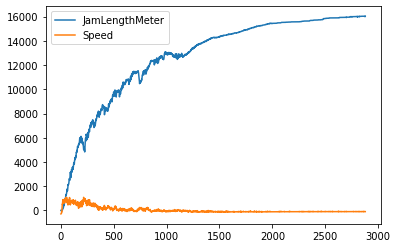

2021-03-17 14:13:53.341557


In [32]:
threshold = { 
    "RAMA4_FP1_TP3_OCC": 10,
    "RAMA4_FP1_END_FLOW": 20,
    "RAMA4_FP3_END_FLOW": 20,
    "RAMA4_FP3_END_OCC": 40,
    "RAMA4_FPX_TP1_UNJAM": 600,
    "RAMA4_FPX_TP5_UNJAM": 300,
    "RAMA4_FP2_END_FLOW": 10,
    "RAMA4_FP4_END_UNJAM": 250,
    "RAMA4_FP5_END_OCC": 20,
    "KLONGTEI_FP2_END_FLOW": 20,
    "NARANONG_FP1_TP2_UNJAM": 300,
    "NARANONG_FP1_END_UNJAM": 700,
    "NARANONG_FP2_END_UNJAM": 1000,
    "NARANONG_FP3_END_FLOW": 20,
    "NARANONG_FP4_END_UNJAM": 1000,
    "NARANONG_FP5_END_OCC": 30,
    "NARANONG_FP6_END_OCC": 20,
    "NARANONG_FPX_TP2_UNJAM": 200,
    "NARANONG_FPX_TP1_UNJAM": 200,
    "SUNLAKAKHON_FP1_END_FLOW": 20,
    "SUNLAKAKHON_FPX_TP1_UNJAM": 400,
    "SUNLAKAKHON_FP2_END_FLOW": 20,
    "SUNLAKAKHON_FP3_TP4_UNJAM": 400,
    "SUNLAKAKHON_FP3_END_FLOW": 60,
    "SUNLAKAKHON_FP4_END_FLOW": 20,
    "KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT": 10,
    "KASEMRAT_FPX_TP2_UNJAM_EB": 1000,
    "KASEMRAT_FPX_TP2_UNJAM_ARI": 10,
    "KASEMRAT_FPX_TP3_UNJAM": 600,
    "KASEMRAT_FP2_TP1_FLOW": 10
}
duration={
    'RAMA4_FP1_END_MAXGREEN' :120,
    'RAMA4_FP1_END_MINGREEN' :15,
    'RAMA4_FP3_END_MAXGREEN': 30,
    'RAMA4_FP2_END_MAXGREEN' : 30,
    'RAMA4_FP4_END_MAXGREEN' : 30,
    'RAMA4_FP5_END_MAXGREEN' : 30,

    'KLONGTEI_NO_P2_MAXGREEN': 120,

    'NARANONG_FP1_END_MAXGREEN': 45,
    'NARANONG_FP1_END_MINGREEN': 15,
    'NARANONG_FP2_END_MAXGREEN': 90,
    'NARANONG_FP2_END_MINGREEN': 15,
    'NARANONG_FP3_END_MAXGREEN': 90,
    'NARANONG_FP3_END_MINGREEN': 15,
    'NARANONG_FP4_END_MAXGREEN': 30,
    'NARANONG_FP4_END_MINGREEN':15,
    'NARANONG_FP5_END_MAXGREEN':30,
    'NARANONG_FP6_END_MAXGREEN': 30,

    'SUNLAKAKHON_FP1_END_MAXGREEN': 180,
    'SUNLAKAKHON_FP2_END_MAXGREEN': 60,
    'SUNLAKAKHON_FP3_END_MAXGREEN': 60,
    'SUNLAKAKHON_FP4_END_MAXGREEN': 60,

    'KASEMRAT_FP3_END_MAXGREEN': 30,
    'KASEMRAT_FP1_END_MAXGREEN': 30,
    'KASEMRAT_FP2_END_MAXGREEN': 120
}
from datetime import datetime
print(datetime.now())
episode0(threshold, duration) #PEAM
print(datetime.now())

In [33]:
# def get_action():
#     i = random.randint(60)
#     return i

In [34]:
# traci.close()

In [35]:
# class KASEMRAT(gym.Env):
#     def __init__(self):
#         self.action_space = gym.spaces.Discrete(60)
#         self.observation_space = gym.spaces.Discrete(29)
#     def step(self, action):
#         action = get_action()
#         state = np.array(state)+np.array(action)
#         reward = episode0(state, duration)
#         done = True
#         return state, reward, done
#     def reset(self):
#             self.reward = 0
#             self.done = False
#             return state

In [36]:
# np.array([1,2])+np.array([1,2])